# 数据清洗

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data = pd.read_csv("./train_data.csv")
test_data = pd.read_csv("./test_a.csv")

In [5]:
print('train_data.shape = {}'.format(train_data.shape)) 
print('test_data.shape = {}'.format(test_data.shape))

train_data.shape = (41440, 51)
test_data.shape = (2469, 50)


In [6]:
train_data.columns

Index(['ID', 'area', 'rentType', 'houseType', 'houseFloor', 'totalFloor',
       'houseToward', 'houseDecoration', 'communityName', 'city', 'region',
       'plate', 'buildYear', 'saleSecHouseNum', 'subwayStationNum',
       'busStationNum', 'interSchoolNum', 'schoolNum', 'privateSchoolNum',
       'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum',
       'parkNum', 'mallNum', 'superMarketNum', 'totalTradeMoney',
       'totalTradeArea', 'tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney',
       'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum',
       'supplyNewNum', 'supplyLandNum', 'supplyLandArea', 'tradeLandNum',
       'tradeLandArea', 'landTotalPrice', 'landMeanPrice', 'totalWorkers',
       'newWorkers', 'residentPopulation', 'pv', 'uv', 'lookNum', 'tradeTime',
       'tradeMoney'],
      dtype='object')

## 1.缺失值

In [7]:
train_data.isnull().sum(),test_data.isnull().sum()

(ID                     0
 area                   0
 rentType               0
 houseType              0
 houseFloor             0
 totalFloor             0
 houseToward            0
 houseDecoration        0
 communityName          0
 city                   0
 region                 0
 plate                  0
 buildYear              0
 saleSecHouseNum        0
 subwayStationNum       0
 busStationNum          0
 interSchoolNum         0
 schoolNum              0
 privateSchoolNum       0
 hospitalNum            0
 drugStoreNum           0
 gymNum                 0
 bankNum                0
 shopNum                0
 parkNum                0
 mallNum                0
 superMarketNum         0
 totalTradeMoney        0
 totalTradeArea         0
 tradeMeanPrice         0
 tradeSecNum            0
 totalNewTradeMoney     0
 totalNewTradeArea      0
 tradeNewMeanPrice      0
 tradeNewNum            0
 remainNewNum           0
 supplyNewNum           0
 supplyLandNum          0
 supplyLandA

In [8]:
train_data["uv"].describe(),train_data["pv"].describe()

(count    41422.000000
 mean      3089.077085
 std       2954.706517
 min          6.000000
 25%       1053.000000
 50%       2375.000000
 75%       4233.000000
 max      39876.000000
 Name: uv, dtype: float64, count     41422.000000
 mean      26945.663512
 std       32174.637924
 min          17.000000
 25%        7928.000000
 50%       20196.000000
 75%       34485.000000
 max      621864.000000
 Name: pv, dtype: float64)

G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


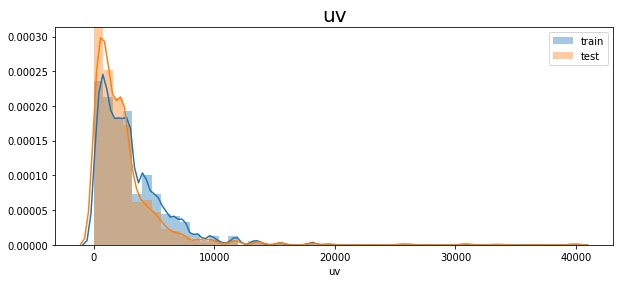

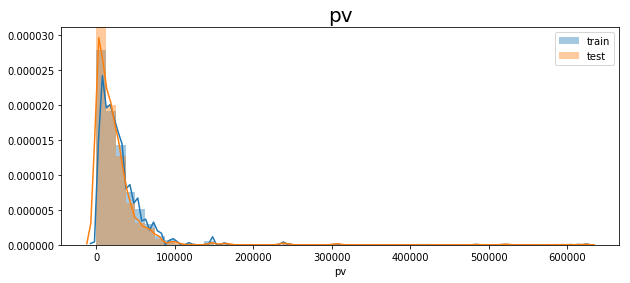

In [9]:
plt.figure(figsize=(10,4))
sns.distplot(train_data["uv"], bins=50)
sns.distplot(test_data["uv"], bins=50) 
plt.title('uv', fontsize=20)
plt.legend(['train','test'])
plt.figure(figsize=(10,4))
sns.distplot(train_data["pv"], bins=50)
sns.distplot(test_data["pv"], bins=50) 
plt.title('pv', fontsize=20)
plt.legend(['train','test'])

In [10]:
train_data["uv"].fillna(train_data["uv"].median(),inplace = True) 
train_data["pv"].fillna(train_data["pv"].median(),inplace = True) 
test_data["uv"].fillna(test_data["uv"].median(),inplace = True) 
test_data["pv"].fillna(test_data["pv"].median(),inplace = True) 

In [11]:
train_data.isnull().sum().sum(),test_data.isnull().sum().sum()

(0, 0)

### uv和pv训练集和测试集分布类似，存在长尾现象，所以用中位数填充

## 2. 异常值处理

- 分析面积和价格

G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


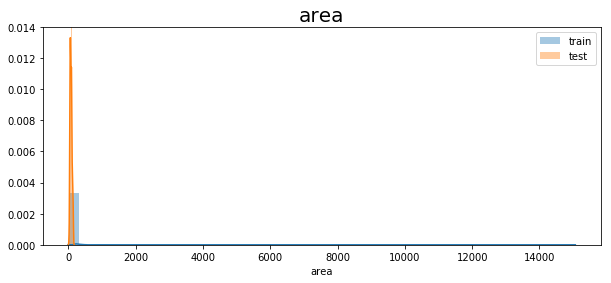

In [12]:
plt.figure(figsize=(10,4))
sns.distplot(train_data["area"], bins=50)
sns.distplot(test_data["area"], bins=50) 
plt.title('area', fontsize=20)
plt.legend(['train','test'])

In [13]:
test_data["area"].describe()

count    2469.000000
mean       76.031839
std        29.080334
min        15.000000
25%        53.000000
50%        73.160000
75%        94.320000
max       150.000000
Name: area, dtype: float64

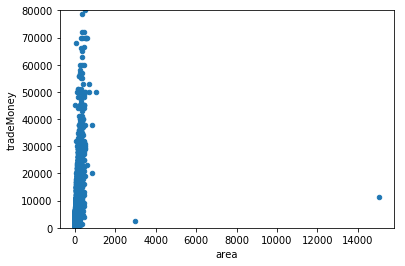

In [14]:
data = pd.concat([train_data["tradeMoney"],train_data["area"]],axis = 1)
data.plot.scatter(x = "area",y = "tradeMoney",ylim=(0,80000)) #离群点？

In [15]:
train_data = train_data[train_data["area"]<400]
train_data = train_data[(train_data["area"]<400)&(train_data["tradeMoney"]<60000)]
train_data = train_data.drop(train_data[(train_data['area']<130)&(train_data["tradeMoney"]>40000)].index)
train_data = train_data.drop(train_data[(train_data['area']>350)&(train_data["tradeMoney"]<5000)].index)
train_data = train_data.drop(train_data[train_data["tradeMoney"]<1].index)
train_data = train_data.drop(train_data[train_data["area"]<10].index)

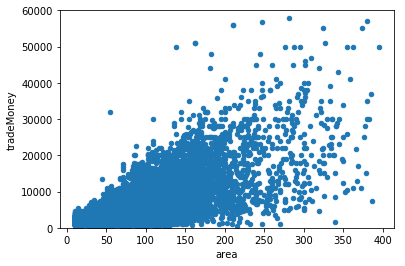

In [16]:
data = pd.concat([train_data["tradeMoney"],train_data["area"]],axis = 1)
data.plot.scatter(x = "area",y = "tradeMoney",ylim=(0,60000)) #离群点

### 测试集中面积是15-150之间的，所以删除训练集中面积大于400的，并且删除，面积大、价格低或面积小、价格高的异常点

- 分析租赁房源信息

- 1.出租方式

In [17]:
plt.rcParams['font.sans-serif'] = ['SimHei']# 图中显示中文

In [18]:
train_data["rentType"].value_counts(),test_data["rentType"].value_counts()

(未知方式    30670
 整租       5447
 合租       4083
 --          5
 Name: rentType, dtype: int64, 未知方式    2185
 整租       264
 合租        20
 Name: rentType, dtype: int64)

(-0.5, 3.5, 0, 15000)

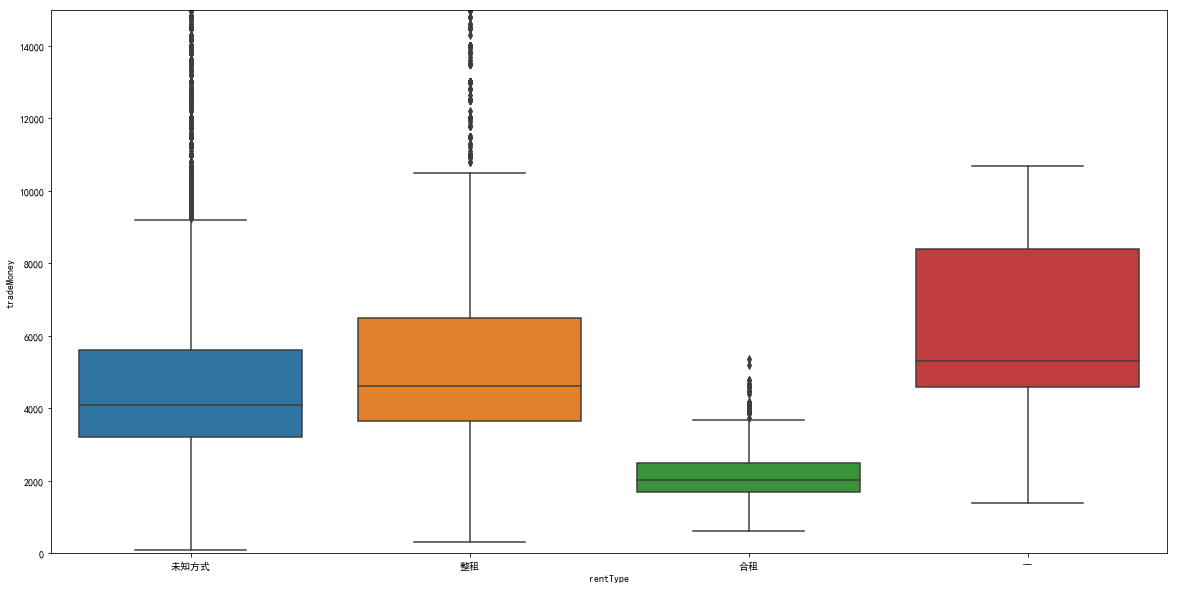

In [19]:
data = pd.concat([train_data["tradeMoney"],train_data["rentType"]],axis = 1)
f,ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x = 'rentType',y = "tradeMoney",data = data )
fig.axis(ymin=0,ymax = 15000)

In [20]:
train_data['rentType'][train_data['rentType']=='--'] = '整租'

In [21]:
lbl = LabelEncoder()
lbl.fit(list(train_data["rentType"].values))
train_data["rentType"] = lbl.transform(list(train_data["rentType"].values))
test_data["rentType"] = lbl.transform(list(test_data["rentType"].values))

In [22]:
train_data["rentType"].value_counts(),test_data["rentType"].value_counts()

(2    30670
 1     5452
 0     4083
 Name: rentType, dtype: int64, 2    2185
 1     264
 0      20
 Name: rentType, dtype: int64)

G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


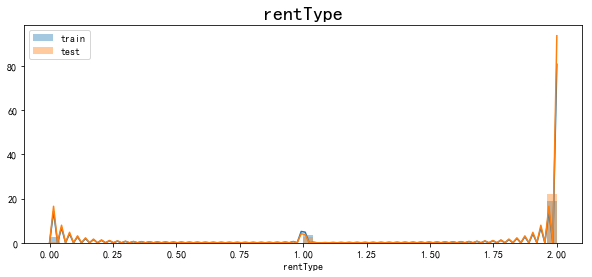

In [23]:
plt.figure(figsize=(10,4))
sns.distplot(train_data["rentType"], bins=50)
sns.distplot(test_data["rentType"], bins=50) 
plt.title('rentType', fontsize=20)
plt.legend(['train','test'])

### rentType类型中，test数据中没有“—”，“—”与整租类似，所以把“—”转换为“整租”，并LabelEncoder编码

- 2. 房型（houseType）

In [24]:
train_data["houseType"].value_counts(),test_data["houseType"].value_counts()

(1室1厅1卫    9797
 2室1厅1卫    8472
 2室2厅1卫    6774
 3室1厅1卫    3335
 3室2厅2卫    2735
 3室2厅1卫    1914
 4室1厅1卫    1592
 1室0厅1卫    1282
 1室2厅1卫     933
 2室2厅2卫     881
 4室2厅2卫     432
 2室0厅1卫     418
 4室2厅3卫     268
 5室1厅1卫     162
 2室1厅2卫     154
 3室2厅3卫     148
 3室1厅2卫     135
 1室0厅0卫      83
 4室2厅4卫      52
 6室1厅1卫      50
 5室2厅3卫      49
 1室1厅2卫      39
 4室3厅3卫      33
 4室2厅1卫      33
 5室2厅2卫      33
 4室3厅4卫      30
 5室3厅3卫      30
 5室2厅4卫      25
 4室1厅2卫      20
 4室3厅2卫      19
           ... 
 7室2厅3卫       2
 2室3厅1卫       2
 5室4厅4卫       2
 6室3厅2卫       2
 5室4厅3卫       2
 4室4厅2卫       1
 5室1厅5卫       1
 4室0厅2卫       1
 3室2厅5卫       1
 3室4厅4卫       1
 8室4厅4卫       1
 5室2厅6卫       1
 6室4厅2卫       1
 8室3厅4卫       1
 6室1厅4卫       1
 3室1厅0卫       1
 7室1厅7卫       1
 5室3厅6卫       1
 5室5厅4卫       1
 5室4厅2卫       1
 2室1厅3卫       1
 8室2厅3卫       1
 5室1厅3卫       1
 7室3厅4卫       1
 6室2厅5卫       1
 3室0厅0卫       1
 4室1厅4卫       1
 7室4厅3卫       1
 7室1厅3卫       1
 6室4厅5卫       1
 Name: houseType, Length

In [25]:
train_data["houseType"].nunique(),test_data["houseType"].nunique()

(96, 31)

In [26]:
train_data['室'] = train_data['houseType'].apply(lambda x:int(x[0]))
train_data['厅'] = train_data['houseType'].apply(lambda x:int(x[2]))
train_data['卫'] = train_data['houseType'].apply(lambda x:int(x[4]))

In [27]:
print(train_data['卫'].value_counts())
print(train_data['厅'].value_counts())
train_data['室'].value_counts()

1    34812
2     4504
3      575
4      164
0      119
5       25
7        4
6        2
Name: 卫, dtype: int64
1    23813
2    14369
0     1823
3      188
4       11
5        1
Name: 厅, dtype: int64


2    16735
1    12162
3     8335
4     2501
5      358
6       89
7       22
8        3
Name: 室, dtype: int64

In [28]:
test_data['室'] = test_data['houseType'].apply(lambda x:int(x[0]))
test_data['厅'] = test_data['houseType'].apply(lambda x:int(x[2]))
test_data['卫'] = test_data['houseType'].apply(lambda x:int(x[4]))

In [29]:
print(test_data['卫'].value_counts())
print(test_data['厅'].value_counts())
test_data['室'].value_counts()

1    2122
2     330
3       9
0       6
6       1
4       1
Name: 卫, dtype: int64
1    1360
2     976
0     128
3       5
Name: 厅, dtype: int64


2    1247
1     712
3     462
4      42
5       5
6       1
Name: 室, dtype: int64

G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-p

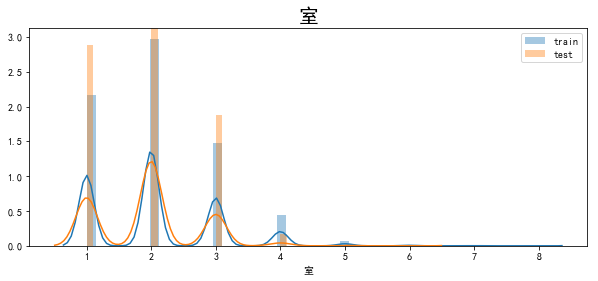

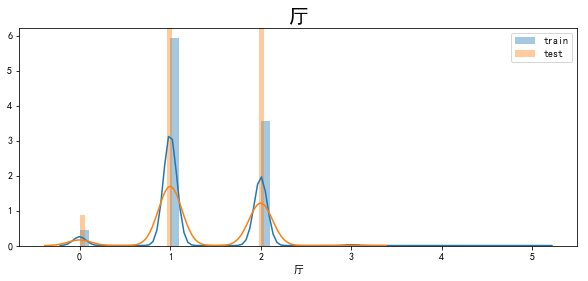

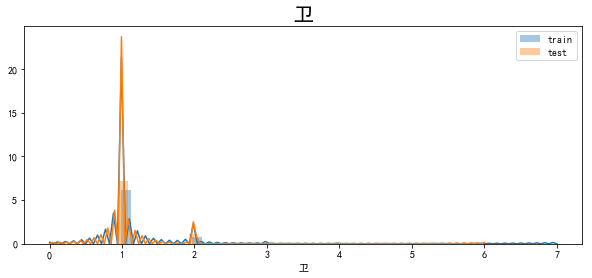

In [30]:
plt.figure(figsize=(10,4))
sns.distplot(train_data["室"], bins=50)
sns.distplot(test_data["室"], bins=50) 
plt.title('室', fontsize=20)
plt.legend(['train','test'])
plt.figure(figsize=(10,4))
sns.distplot(train_data["厅"], bins=50)
sns.distplot(test_data["厅"], bins=50) 
plt.title('厅', fontsize=20)
plt.legend(['train','test'])
plt.figure(figsize=(10,4))
sns.distplot(train_data["卫"], bins=50)
sns.distplot(test_data["卫"], bins=50) 
plt.title('卫', fontsize=20)
plt.legend(['train','test'])

In [31]:
train_data = train_data.drop(train_data[train_data['室']==0].index)
train_data = train_data.drop(train_data[train_data['室']==7].index)
train_data = train_data.drop(train_data[train_data['室']==8].index)
train_data = train_data.drop(train_data[train_data['室']==9].index)

train_data = train_data.drop(train_data[train_data['厅']==4].index)
train_data = train_data.drop(train_data[train_data['厅']==5].index)

train_data = train_data.drop(train_data[train_data['卫']==8].index)
train_data = train_data.drop(train_data[train_data['卫']==7].index)
train_data = train_data.drop(train_data[train_data['卫']==5].index)

In [32]:
train_data.shape

(40143, 54)

G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-p

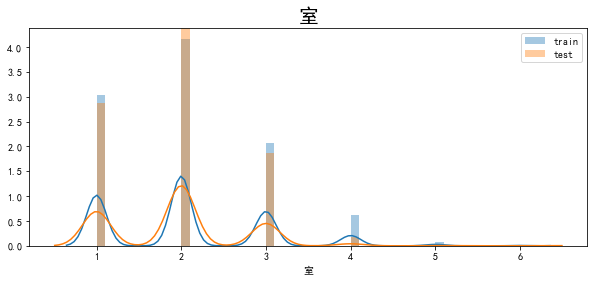

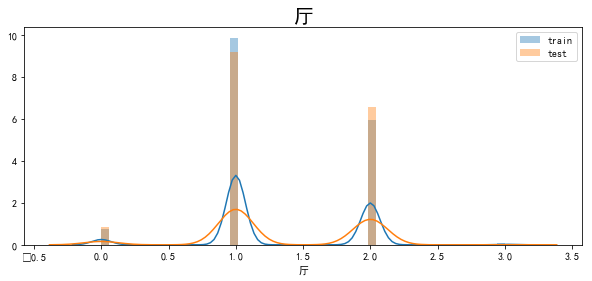

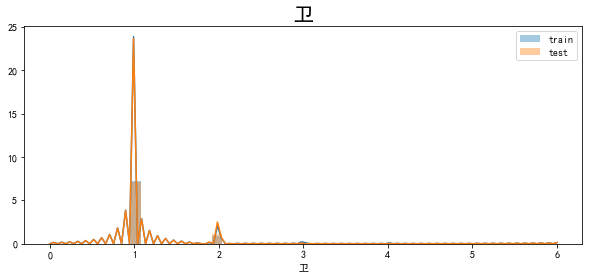

In [33]:
plt.figure(figsize=(10,4))
sns.distplot(train_data["室"], bins=50)
sns.distplot(test_data["室"], bins=50) 
plt.title('室', fontsize=20)
plt.legend(['train','test'])
plt.figure(figsize=(10,4))
sns.distplot(train_data["厅"], bins=50)
sns.distplot(test_data["厅"], bins=50) 
plt.title('厅', fontsize=20)
plt.legend(['train','test'])
plt.figure(figsize=(10,4))
sns.distplot(train_data["卫"], bins=50)
sns.distplot(test_data["卫"], bins=50) 
plt.title('卫', fontsize=20)
plt.legend(['train','test'])

### 删除掉测试集中没有的室、厅、卫。

- 3.所在楼层

In [34]:
print(train_data["houseFloor"].value_counts())
test_data["houseFloor"].value_counts()

中    15068
高    13596
低    11479
Name: houseFloor, dtype: int64


中    931
高    842
低    696
Name: houseFloor, dtype: int64

In [35]:
lbl = LabelEncoder()
lbl.fit(list(train_data["houseFloor"].values))
train_data["houseFloor"] = lbl.transform(list(train_data["houseFloor"].values))
test_data["houseFloor"] = lbl.transform(list(test_data["houseFloor"].values))

G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
G:\tools\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


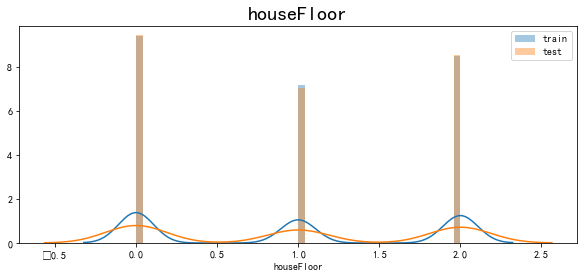

In [36]:
plt.figure(figsize=(10,4))
sns.distplot(train_data["houseFloor"], bins=50)
sns.distplot(test_data["houseFloor"], bins=50) 
plt.title('houseFloor', fontsize=20)
plt.legend(['train','test'])

### 略

### 略

- region

In [37]:
train_data["region"].nunique(),test_data["region"].nunique()

(15, 14)

In [38]:
train_data["region"].value_counts(),test_data["region"].value_counts()

(RG00002    11068
 RG00005     5607
 RG00003     3998
 RG00010     3439
 RG00012     3315
 RG00004     3160
 RG00006     1961
 RG00007     1571
 RG00008     1233
 RG00013     1198
 RG00001     1138
 RG00014     1041
 RG00011      746
 RG00009      667
 RG00015        1
 Name: region, dtype: int64, RG00002    724
 RG00005    311
 RG00012    262
 RG00010    194
 RG00003    178
 RG00004    153
 RG00007    142
 RG00013     97
 RG00014     86
 RG00008     86
 RG00001     77
 RG00009     61
 RG00006     55
 RG00011     43
 Name: region, dtype: int64)

In [39]:
train_reg = train_data["region"].value_counts().keys()
test_reg = test_data["region"].value_counts().keys()

In [40]:
# find different
for i in train_reg:
    if i not in test_reg:
        print(i)

RG00015


In [41]:
train_data = train_data.drop(train_data[train_data['region']=="RG00015"].index)

In [42]:
train_data.shape

(40142, 54)

(-0.5, 13.5, 0, 15000)

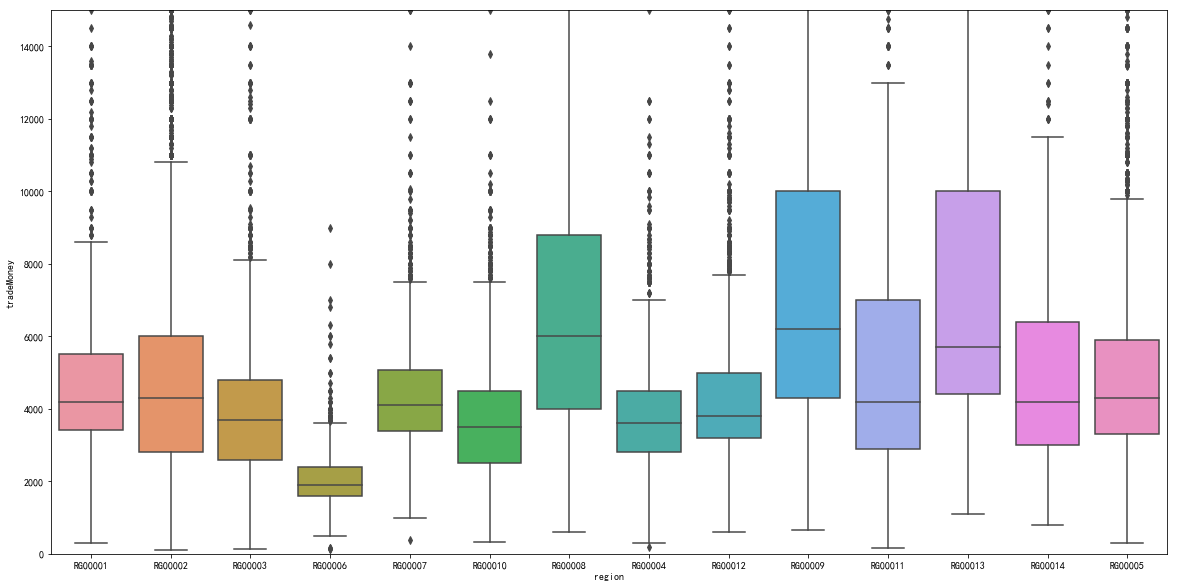

In [43]:
data = pd.concat([train_data["tradeMoney"],train_data["region"]],axis = 1)
f,ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x = 'region',y = "tradeMoney",data = data )
fig.axis(ymin=0,ymax = 15000)

In [44]:
reg_a_t = train_data.groupby("region")["area","tradeMoney"].agg({"mean","median","max","min"})

In [45]:
reg_a_t

area                            tradeMoney                        \
          min        mean     max median        min         mean      max   
region                                                                      
RG00001  10.0   58.913752  276.00  49.20      300.0  5180.412127  48000.0   
RG00002  10.0   73.056039  395.75  68.00      100.0  5272.816317  58000.0   
RG00003  10.0   77.839540  387.00  77.45      140.0  3939.671086  35861.0   
RG00004  10.0   72.277633  340.00  73.69      200.0  3809.108228  16000.0   
RG00005  10.0   78.331953  385.43  70.70      300.0  5322.538969  57000.0   
RG00006  20.0   83.153427  300.74  84.00      140.0  2034.853136   9000.0   
RG00007  10.0   51.501082  228.16  43.00      370.0  4647.781668  25000.0   
RG00008  10.0   69.133106  265.00  63.33      600.0  6825.931062  41000.0   
RG00009  10.0   69.225607  362.00  52.49      650.0  7703.037481  50000.0   
RG00010  10.0   65.893286  380.00  66.25      320.0  3705.768247  30000.0   
RG00011  10.0  106.247480  377.00  89.60      160.0  6088.037534  55000.0   
RG00012  10.0   51.863493  223.25  44.17      600.0  4442.732428  24000.0   
RG00013  10.0   72.785442  298.05  55.48     1100.0  8429.321369  38000.0   
RG00014  10.0   64.003199  350.00  55.14      800.0  5148.324688  36000.0   

                 
         median  
region           
RG00001  4200.0  
RG00002  4300.0  
RG00003  3700.0  
RG00004  3600.0  
RG00005  4300.0  
RG00006  1900.0  
RG00007  4100.0  
RG00008  6000.0  
RG00009  6200.0  
RG00010  3500.0  
RG00011  4200.0  
RG00012  3800.0  
RG00013  5700.0  
RG00014  4200.0

- communityName

In [46]:
train_data["communityName"].nunique(),test_data["communityName"].nunique()

(4189, 2469)

In [47]:
train_com = train_data["communityName"].value_counts().keys()
test_com = test_data["communityName"].value_counts().keys()

In [48]:
# find different
add1 = 0
for i in train_com:
    if i not in test_com:
        add1+=1
add1

1723

In [49]:
4189-2469

1720

### 训练集中有一半的小区名字没有出现在测试集合中，咋办

- city

In [50]:
train_data["city"].value_counts(),test_data["city"].value_counts()

(SH    40142
 Name: city, dtype: int64, SH    2469
 Name: city, dtype: int64)

In [51]:
train_data = train_data.drop(["city"],axis = 1)

- plate

In [52]:
print(train_data["plate"].value_counts())
test_data["plate"].value_counts()

BK00031    1958
BK00033    1798
BK00045    1748
BK00055    1522
BK00056    1473
BK00052    1321
BK00051    1252
BK00017    1244
BK00054    1216
BK00041    1208
BK00046    1179
BK00035    1143
BK00042    1051
BK00009    1005
BK00050     952
BK00043     901
BK00026     889
BK00013     822
BK00034     821
BK00047     817
BK00053     750
BK00028     719
BK00040     669
BK00060     644
BK00010     639
BK00029     636
BK00018     606
BK00062     587
BK00064     577
BK00005     539
           ... 
BK00011     454
BK00037     433
BK00012     395
BK00024     390
BK00038     382
BK00020     381
BK00002     345
BK00027     344
BK00065     342
BK00039     334
BK00063     275
BK00057     265
BK00015     249
BK00006     228
BK00007     222
BK00066     219
BK00030     216
BK00021     212
BK00049     211
BK00008     209
BK00004     188
BK00048     164
BK00025     151
BK00023     126
BK00059     122
BK00044      90
BK00016      40
BK00036      27
BK00058      15
BK00032       3
Name: plate, Length: 65,

BK00056    125
BK00054    114
BK00052     99
BK00055     99
BK00033     92
BK00028     79
BK00045     78
BK00009     66
BK00010     64
BK00035     61
BK00017     60
BK00041     57
BK00013     57
BK00031     55
BK00051     54
BK00034     53
BK00043     52
BK00026     50
BK00064     49
BK00047     46
BK00042     44
BK00005     44
BK00050     44
BK00060     44
BK00012     43
BK00029     42
BK00053     41
BK00018     38
BK00046     37
BK00024     36
          ... 
BK00011     32
BK00002     31
BK00037     31
BK00022     31
BK00061     30
BK00062     30
BK00038     27
BK00040     24
BK00039     22
BK00014     22
BK00007     21
BK00030     21
BK00004     20
BK00006     19
BK00020     19
BK00015     18
BK00057     16
BK00065     15
BK00008     13
BK00025     13
BK00066     13
BK00023     12
BK00063     11
BK00021     11
BK00048     10
BK00049      9
BK00059      8
BK00044      7
BK00016      3
BK00036      1
Name: plate, Length: 63, dtype: int64

In [53]:
train_pla = train_data["plate"].value_counts().keys()
test_pla = test_data["plate"].value_counts().keys()

# find different
for i in train_pla:
    if i not in test_pla:
        print(i)

BK00058
BK00032


In [54]:
for i in test_pla:
    if i not in train_pla:
        print(i)

In [55]:
trian_data = train_data.drop(train_data[(train_data["plate"] == "BK00058")|(train_data["plate"] == "BK00032")].index)

(-0.5, 64.5, 0, 23000)

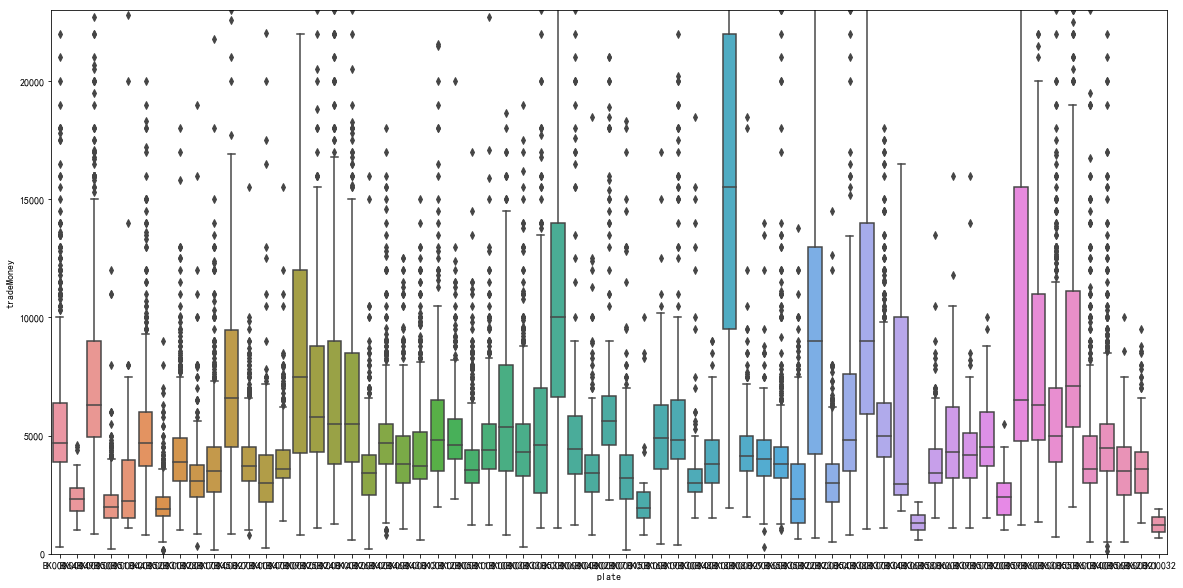

In [56]:
data = pd.concat([train_data["tradeMoney"],train_data["plate"]],axis = 1)
f,ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x = 'plate',y = "tradeMoney",data = data )
fig.axis(ymin=0,ymax = 23000)

## 总结

- 删除数据分布不同的值